In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
profiles = pd.read_csv("profiles.csv")
profiles.head()


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [16]:
print("columns:", profiles.columns)
print(profiles.dtypes)

columns: Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex            

In [17]:
print(profiles.describe())

                age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.340290     68.295281    20033.222534
std        9.452779      3.994803    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000


In [18]:
print(profiles.info())
print(profiles.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

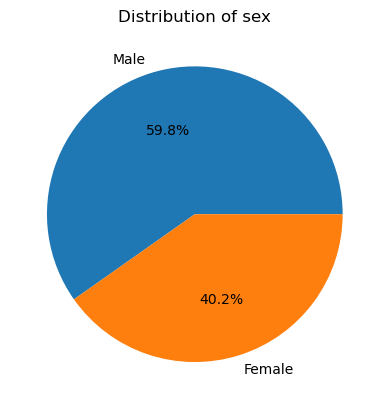

In [19]:
plt.pie(profiles["sex"].value_counts(), autopct='%1.1f%%', labels= ["Male", "Female"])
plt.title("Distribution of sex")
plt.show()

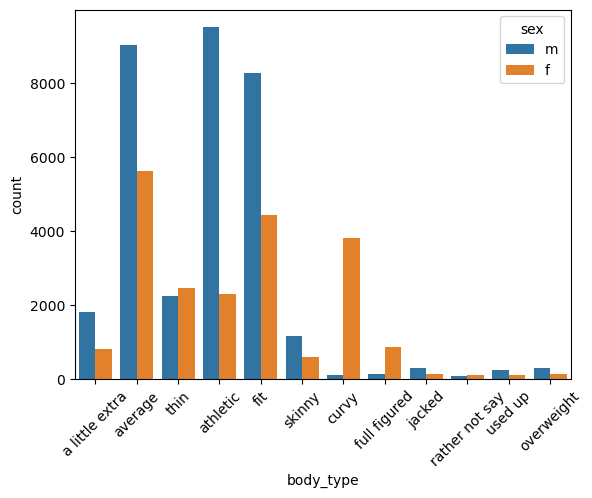

In [20]:
sns.countplot(data= profiles, x= "body_type", hue= "sex")
plt.xticks(rotation=45)
plt.show()

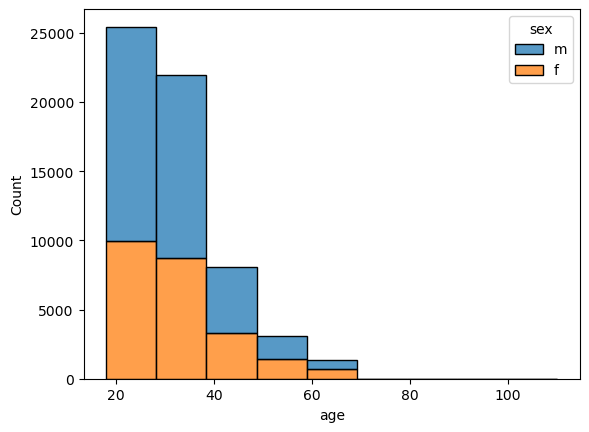

In [21]:
sns.histplot(data= profiles, x= "age", hue="sex",multiple= "stack", binwidth=10)
plt.show()

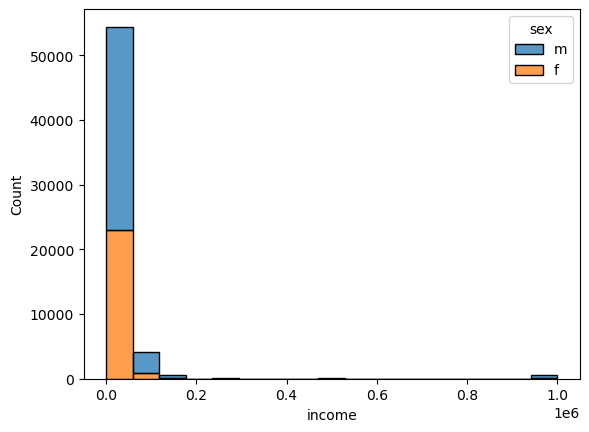

In [22]:
sns.histplot(data= profiles, x= "income", hue= "sex", multiple= "stack")
plt.show()

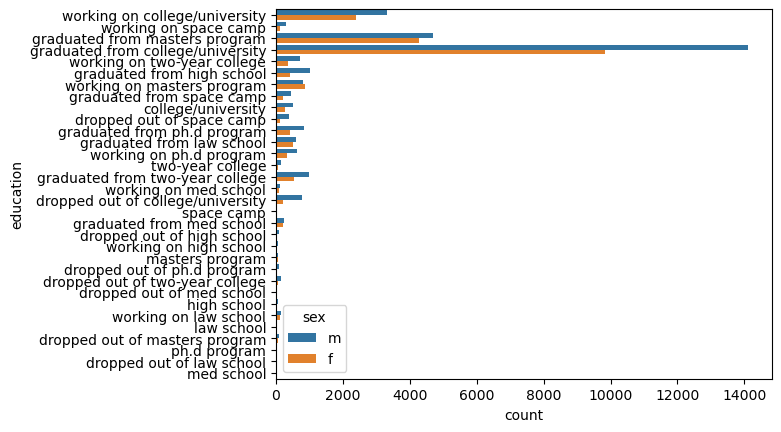

In [23]:
sns.countplot(data= profiles, y= "education", hue= "sex")
plt.show()

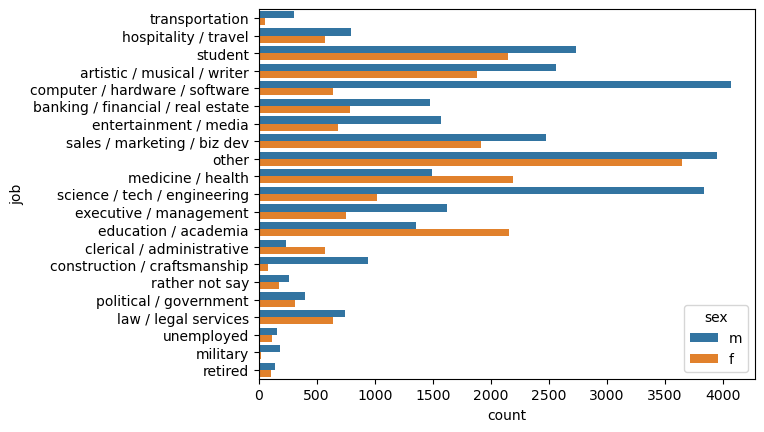

In [24]:
sns.countplot(data= profiles, y= "job", hue= "sex")
plt.show()

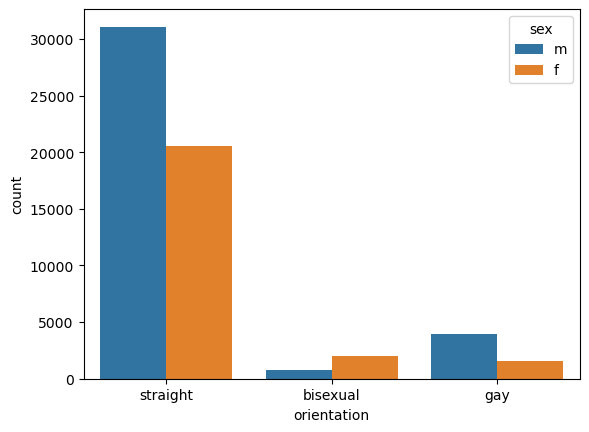

In [25]:
sns.countplot(data= profiles, x= "orientation", hue= "sex")
plt.show()

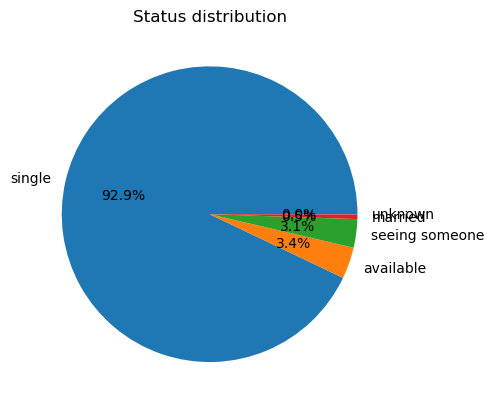

In [26]:
plt.pie(profiles["status"].value_counts(), autopct='%1.1f%%', labels= profiles["status"].unique())
plt.title("Status distribution")
plt.show()

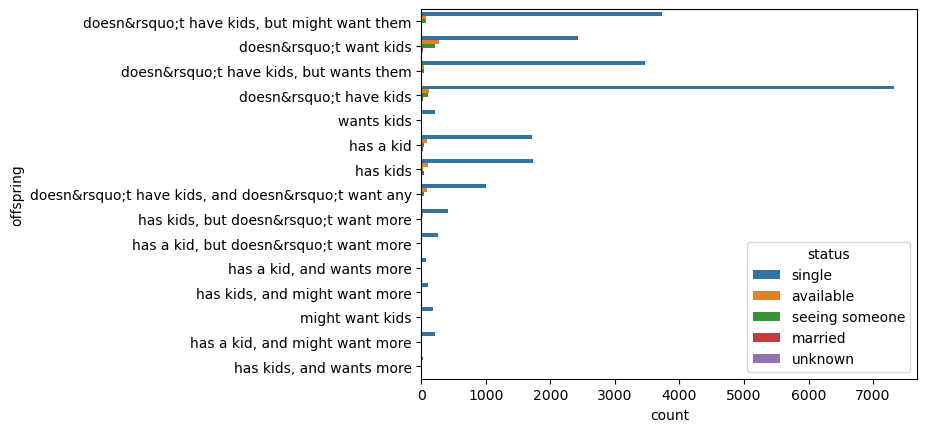

In [27]:
sns.countplot(data= profiles, y= "offspring", hue= "status")
plt.show()

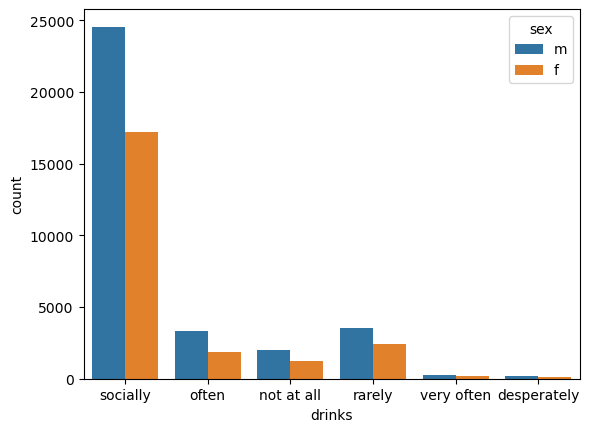

In [28]:
sns.countplot(data= profiles, x= "drinks", hue= "sex")
plt.show()

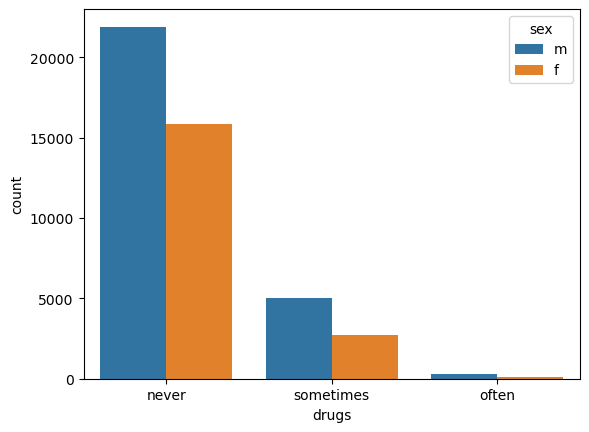

In [29]:
sns.countplot(data= profiles, x= "drugs", hue= "sex")
plt.show()

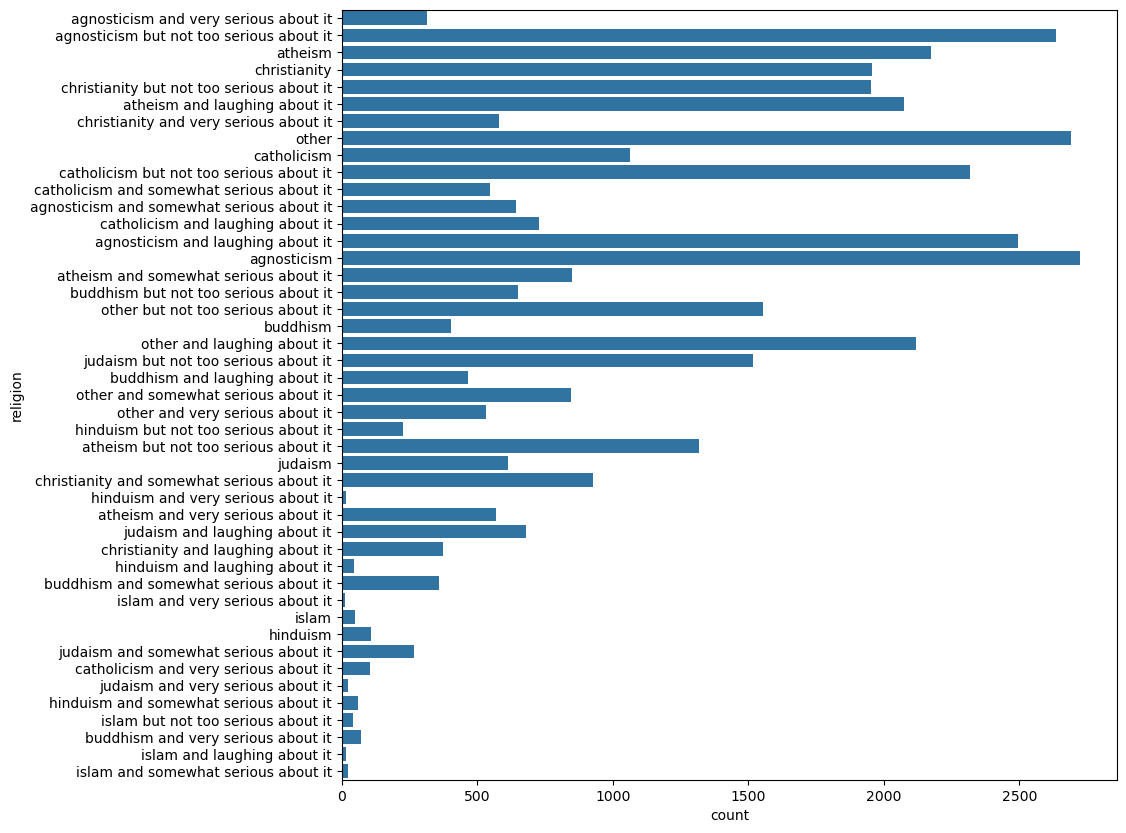

In [30]:
plt.figure(figsize= (10, 10))
sns.countplot(data= profiles, y= "religion")
plt.show()

<Axes: xlabel='count', ylabel='short_religion'>

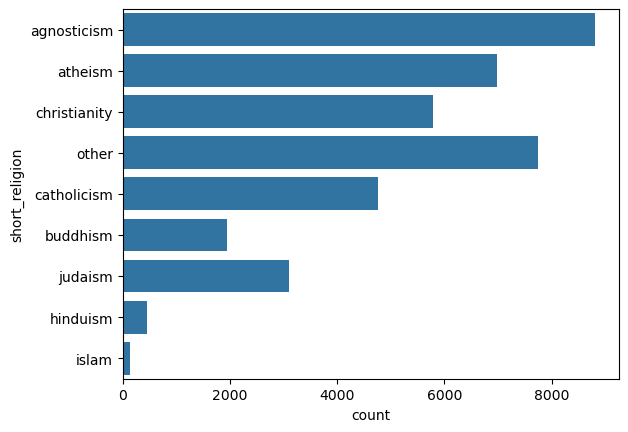

In [31]:
profiles["short_religion"] = profiles["religion"].str.split().str.get(0)
sns.countplot(data= profiles, y= "short_religion")


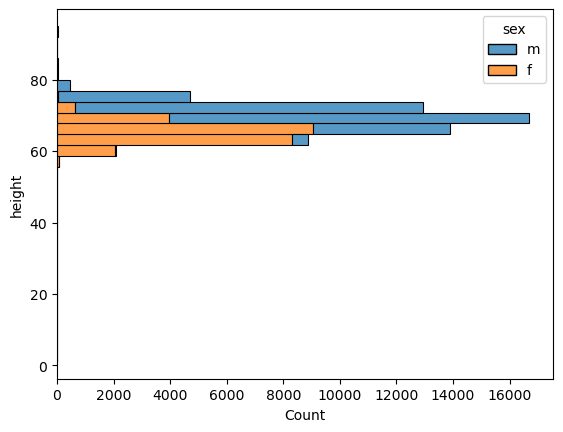

In [32]:
sns.histplot(data= profiles, y= "height", hue="sex", multiple= "stack", binwidth= 3)
plt.show()

In [33]:
cols = ["body_type", "diet", "drinks", "drugs", "education", "job", "orientation", "sex", "short_religion"]
profiles_df = profiles[cols].dropna()
profiles_df = pd.get_dummies(profiles_df, dtype= int)
profiles_df["status"] = profiles["status"]
profiles_df.head()

,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,...,short_religion_agnosticism,short_religion_atheism,short_religion_buddhism,short_religion_catholicism,short_religion_christianity,short_religion_hinduism,short_religion_islam,short_religion_judaism,short_religion_other,status
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,single
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,single
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,single
9,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,single
11,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,seeing someone


In [34]:
X = profiles_df.drop(columns= ["status"])
y = profiles_df["status"]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [36]:
nneighbors_score = []
for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(x_train, y_train)
    nneighbors_score.append(model.score(x_test, y_test))
best_score = np.max(nneighbors_score) 
best_nneighbor = np.argmax(nneighbors_score) + 1

In [37]:
classifier = KNeighborsClassifier(n_neighbors= best_nneighbor)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of K-Nearest Neighbors model: ", accuracy)

The accuracy of K-Nearest Neighbors model:  0.934931506849315


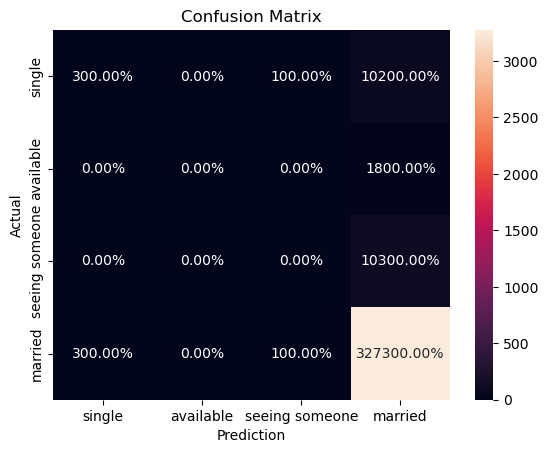

In [39]:
cm = confusion_matrix(y_test, y_pred)
labels = y_test.unique()
sns.heatmap(cm, annot= True, fmt='.2%', xticklabels= labels, yticklabels= labels)
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()